In [2]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings('ignore')


In [3]:
file = 'C:/Users/vidheesha/OneDrive/Desktop/Vidheesha/python datasets/sales_dataset.csv'
data = pd.read_csv(file)
data.dtypes

date                     object
inside_sales            float64
outside_sales           float64
inside_covers             int64
outside_covers            int64
reserved_covers           int64
walkin_covers             int64
waitlist_covers           int64
no_show_covers            int64
no_show_parties           int64
apparent_temperature    float64
humidity                float64
precip_intensity_max    float64
precip_prob             float64
precip_type              object
pressure                float64
summary                  object
temperature             float64
dtype: object

In [4]:
data.describe()

,inside_sales,outside_sales,inside_covers,outside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,apparent_temperature,humidity,precip_intensity_max,precip_prob,pressure,temperature
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,14114.727430,2049.743537,176.860957,33.650723,131.037820,26.771969,58.645161,9.846496,3.785317,55.219600,0.637987,0.028081,0.080400,1016.804816,56.156029
std,2462.070944,2526.961403,26.394633,41.327557,15.496343,24.987931,28.284464,7.251205,2.738321,20.292571,0.188582,0.064635,0.227303,7.950759,18.004652
min,-1963.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.440000,0.140000,0.000000,0.000000,989.220000,9.160000
25%,12922.205000,0.000000,168.000000,0.000000,122.000000,3.000000,38.000000,4.000000,2.000000,39.225000,0.490000,0.000000,0.000000,1011.810000,40.970000
50%,14078.370000,0.000000,180.000000,0.000000,131.000000,20.000000,51.000000,8.000000,3.000000,56.050000,0.620000,0.000600,0.000000,1016.590000,56.050000
75%,15434.800000,4605.500000,192.000000,74.000000,140.000000,45.500000,73.000000,14.000000,5.000000,72.865000,0.790000,0.021100,0.000000,1021.795000,72.385000
max,30080.000000,8129.500000,246.000000,137.000000,197.000000,134.000000,150.000000,40.000000,14.000000,96.240000,1.000000,0.668000,1.000000,1039.820000,90.570000


In [5]:
data.isnull().sum() #returns if there are any null values 

date                    0
inside_sales            0
outside_sales           0
inside_covers           0
outside_covers          0
reserved_covers         0
walkin_covers           0
waitlist_covers         0
no_show_covers          0
no_show_parties         0
apparent_temperature    0
humidity                0
precip_intensity_max    0
precip_prob             0
precip_type             0
pressure                0
summary                 0
temperature             0
dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'],errors='coerce')
data['year'] = data['date'].dt.year# adding a year colum
data['day_of_week'] = data['date'].dt.day_name() #adding new column day of week


data = data.set_index('date')
data.head()




,inside_sales,outside_sales,inside_covers,outside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,apparent_temperature,humidity,precip_intensity_max,precip_prob,precip_type,pressure,summary,temperature,year,day_of_week
date,,,,,,,,,,,,,,,,,,,
2017-02-01,12154.00,0.0,121,0,106,26,42,17,6,35.58,0.92,0.0242,0.79,rain,1027.98,rain,39.06,2017,Wednesday
2017-03-01,8440.00,0.0,148,0,119,31,31,14,4,41.50,0.94,0.0913,0.77,rain,1000.08,rain,43.19,2017,Wednesday
2017-04-01,12927.64,0.0,174,0,131,17,26,5,2,36.81,0.40,0.0176,0.00,none,1002.55,clear-night,42.29,2017,Saturday
2017-05-01,14457.79,0.0,191,0,138,25,28,4,2,27.11,0.48,0.0000,0.00,none,1014.61,cloudy,31.36,2017,Monday
2017-06-01,15331.97,0.0,200,0,130,16,54,6,3,24.74,0.48,0.0019,0.00,none,1022.80,partly-cloudy-night,29.42,2017,Thursday


In [7]:
temp_enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans') 
x = temp_enc.fit_transform(data[['apparent_temperature']]) # divides data in five bins using kmeans
temp = pd.DataFrame(x, index=data.index)
temp.head()
temp = temp.replace({0:'very_cold',1: 'cold',2: 'warm',3: 'hot'})
data = data.merge(temp, on = 'date', how= 'left')
data = data.rename(columns={0: 'temperature_bin'})
temp.head()

,0
date,
2017-02-01,cold
2017-03-01,cold
2017-04-01,cold
2017-05-01,very_cold
2017-06-01,very_cold


In [8]:
data['inside_ppa'] = data['inside_sales'] / data['inside_covers'] #adding perperson inside sale
data.head()


,inside_sales,outside_sales,inside_covers,outside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,apparent_temperature,...,precip_intensity_max,precip_prob,precip_type,pressure,summary,temperature,year,day_of_week,temperature_bin,inside_ppa
date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,12154.00,0.0,121,0,106,26,42,17,6,35.58,...,0.0242,0.79,rain,1027.98,rain,39.06,2017,Wednesday,cold,100.446281
2017-03-01,8440.00,0.0,148,0,119,31,31,14,4,41.50,...,0.0913,0.77,rain,1000.08,rain,43.19,2017,Wednesday,cold,57.027027
2017-04-01,12927.64,0.0,174,0,131,17,26,5,2,36.81,...,0.0176,0.00,none,1002.55,clear-night,42.29,2017,Saturday,cold,74.296782
2017-05-01,14457.79,0.0,191,0,138,25,28,4,2,27.11,...,0.0000,0.00,none,1014.61,cloudy,31.36,2017,Monday,very_cold,75.695236
2017-06-01,15331.97,0.0,200,0,130,16,54,6,3,24.74,...,0.0019,0.00,none,1022.80,partly-cloudy-night,29.42,2017,Thursday,very_cold,76.659850


In [9]:
data[['inside_sales','inside_covers']].resample('Y').agg(['mean','std'])

inside_sales              inside_covers           
                    mean          std          mean        std
date                                                          
2017-12-31  14197.372758  2050.504688    181.752089  25.133106
2018-12-31  13905.275758  2711.867980    172.165289  26.146215
2019-12-31  14538.477877  3054.133784    176.541899  27.581385

In [10]:
data.groupby('day_of_week')['inside_sales'].agg(['mean','std'])

,mean,std
day_of_week,,
Friday,14620.548538,2057.838697
Monday,13475.066457,2654.227347
Saturday,15128.300157,2940.143565
Sunday,13915.616822,2053.520806
Thursday,13912.930781,1787.880161
Tuesday,13376.896905,2176.792924
Wednesday,14567.924403,3352.719418


In [11]:
data.groupby('precip_type')['inside_sales'].agg(['mean'])

,mean
precip_type,
none,14544.007151
rain,13549.393134
sleet,8456.000000
snow,14463.489615


In [12]:
data.groupby('temperature_bin')['inside_sales'].agg(['mean','std'])

,mean,std
temperature_bin,,
cold,14175.646394,2499.019068
hot,13776.771918,2627.407674
very_cold,14559.963333,2901.868746
warm,14399.662308,2341.068996


<AxesSubplot:xlabel='inside_covers', ylabel='inside_sales'>

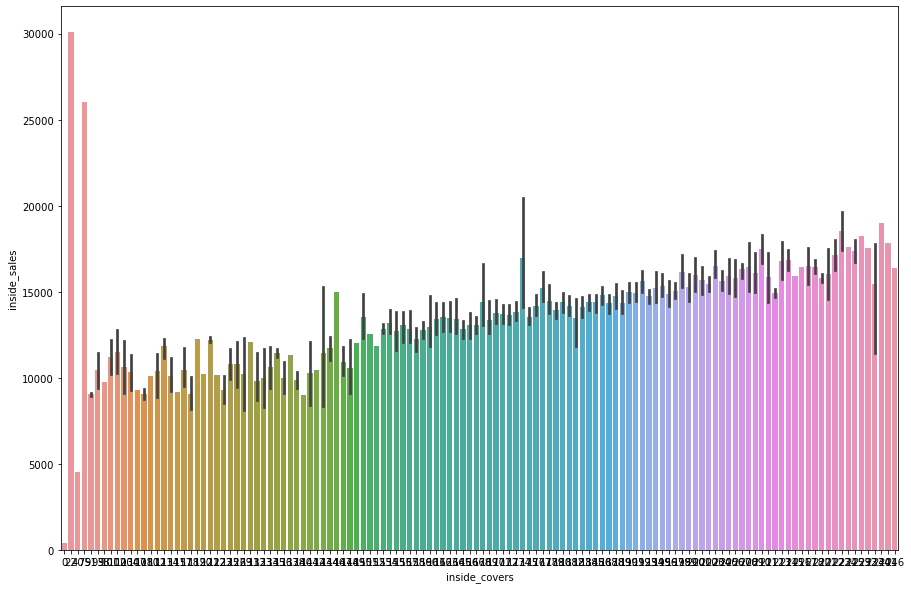

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['inside_covers'],y=data['inside_sales'])

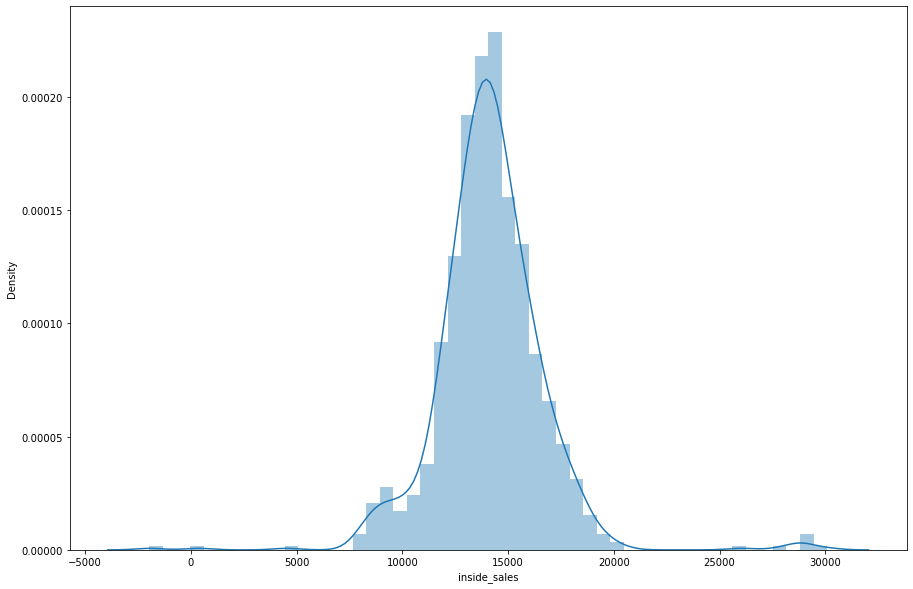

In [14]:
plt.figure(figsize=(15,10))
sns.distplot(data['inside_sales']);

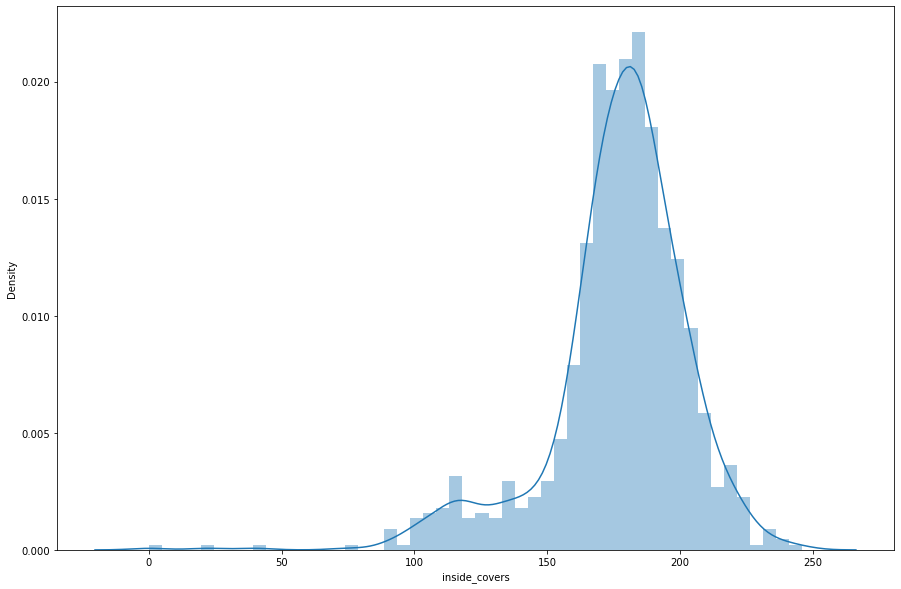

In [15]:
plt.figure(figsize=(15,10))
sns.distplot(data['inside_covers']);

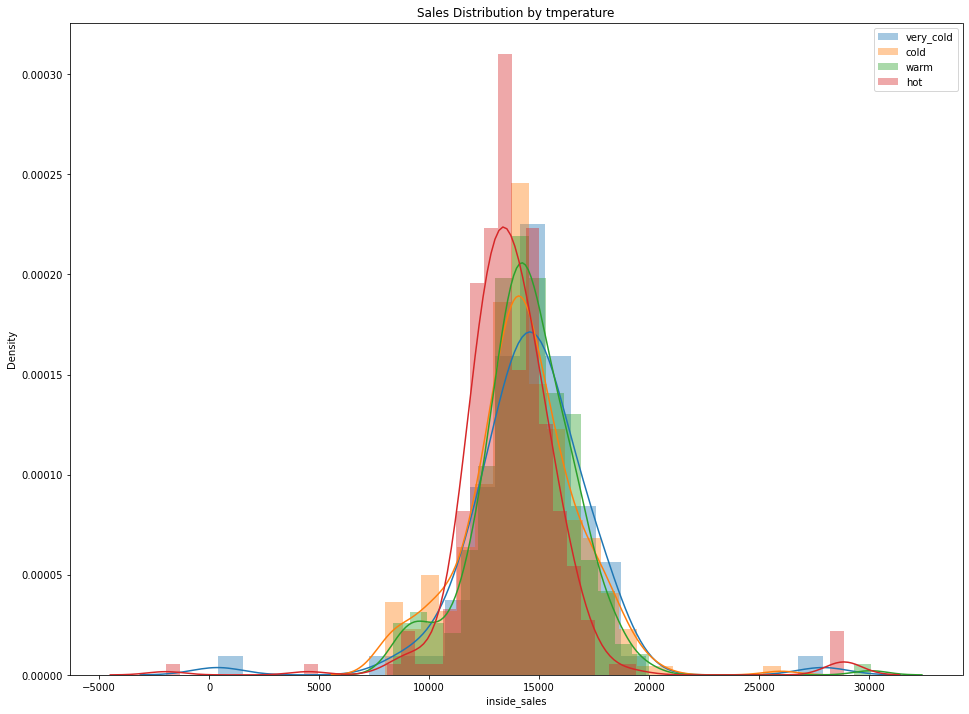

In [16]:
plt.figure(figsize=(16,12))
sns.distplot(data[data['temperature_bin'] == 'very_cold']['inside_sales'], label="very_cold")
sns.distplot(data[data['temperature_bin']=='cold']['inside_sales'], label = 'cold')
sns.distplot(data[data['temperature_bin']=='warm']['inside_sales'], label = 'warm')
sns.distplot(data[data['temperature_bin']=='hot']['inside_sales'], label = 'hot')
plt.legend()
plt.title('Sales Distribution by tmperature')
plt.show();

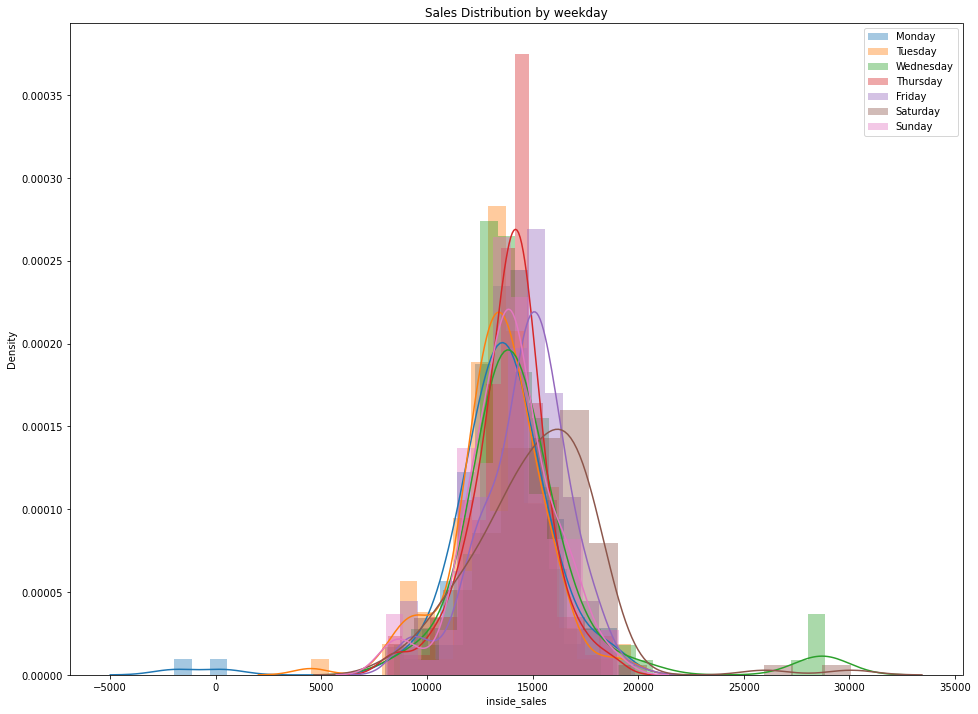

In [17]:
plt.figure(figsize=(16,12))
sns.distplot(data[data['day_of_week'] == 'Monday']['inside_sales'], label="Monday")
sns.distplot(data[data['day_of_week']=='Tuesday']['inside_sales'], label = 'Tuesday')
sns.distplot(data[data['day_of_week']=='Wednesday']['inside_sales'], label = 'Wednesday')
sns.distplot(data[data['day_of_week']=='Thursday']['inside_sales'], label = 'Thursday')
sns.distplot(data[data['day_of_week']=='Friday']['inside_sales'], label = 'Friday')
sns.distplot(data[data['day_of_week']=='Saturday']['inside_sales'], label = 'Saturday')
sns.distplot(data[data['day_of_week']=='Sunday']['inside_sales'], label = 'Sunday')
plt.legend()
plt.title('Sales Distribution by weekday')
plt.show();

<AxesSubplot:>

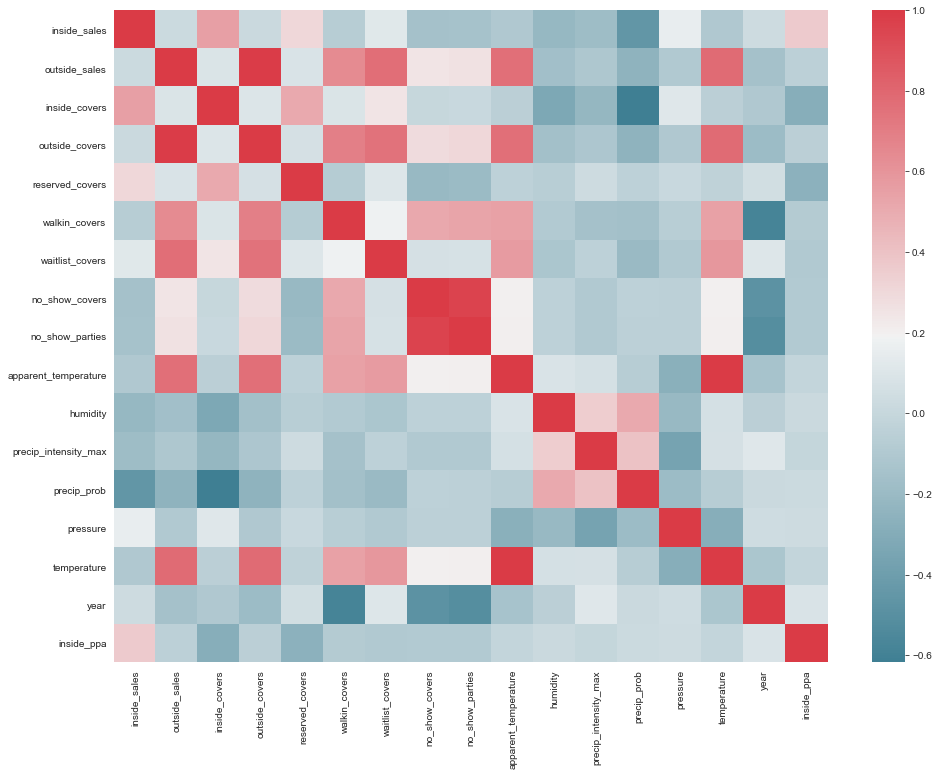

In [18]:
plt.figure(figsize=(16,12))
z = data.corr()
sns.set_style('whitegrid')
sns.heatmap(z, cmap = sns.diverging_palette(220, 10, as_cmap=True))

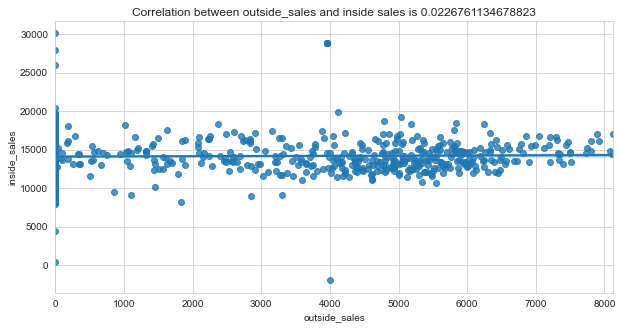

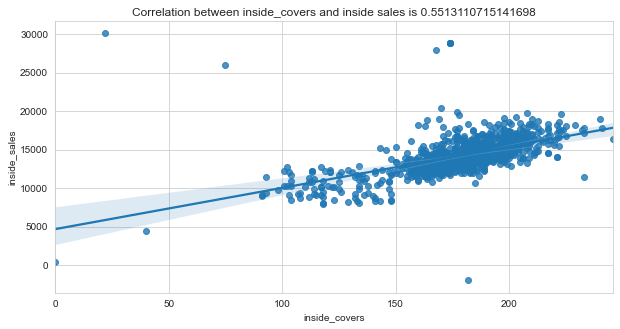

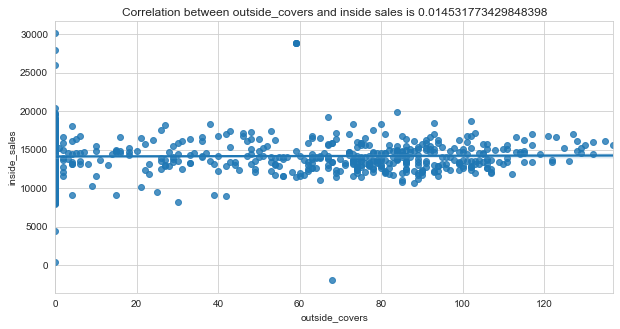

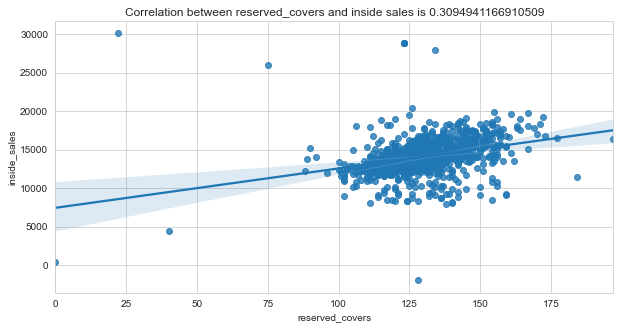

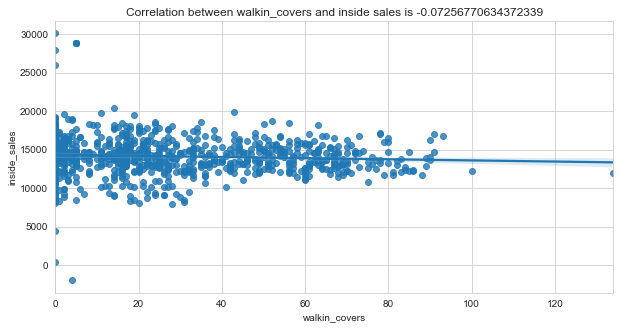

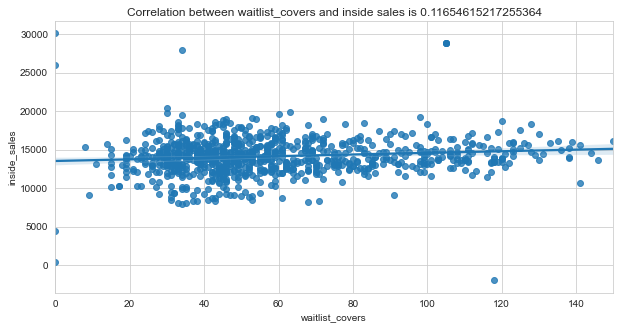

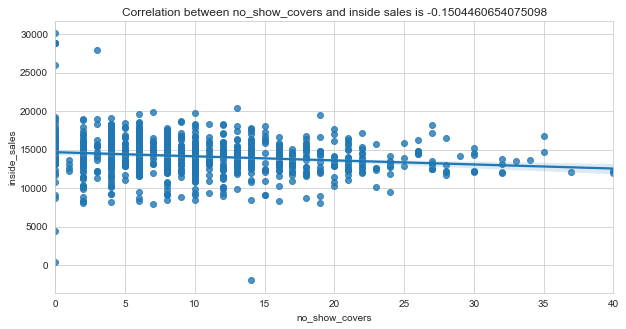

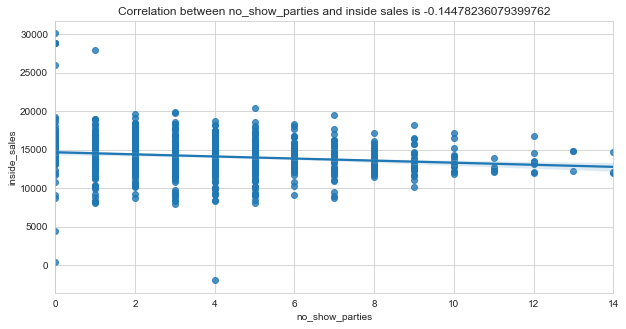

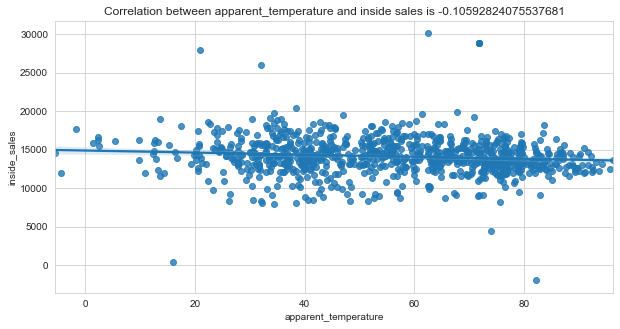

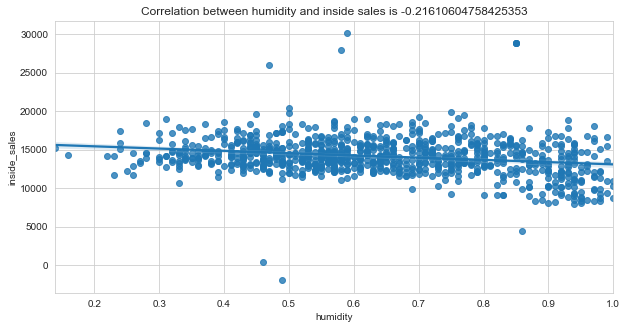

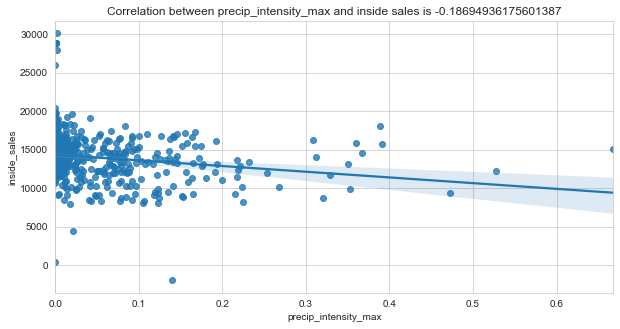

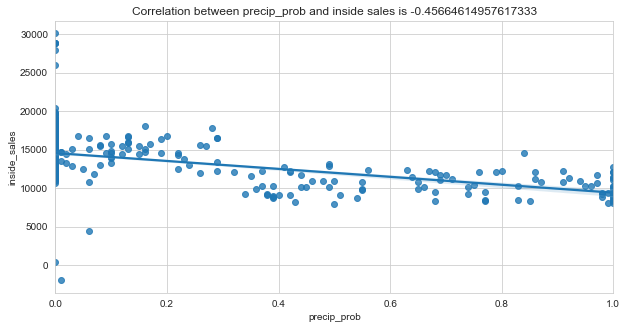

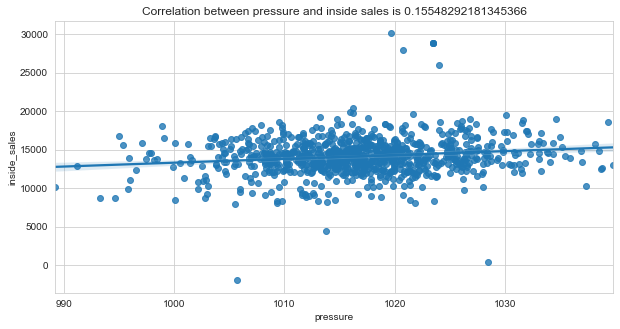

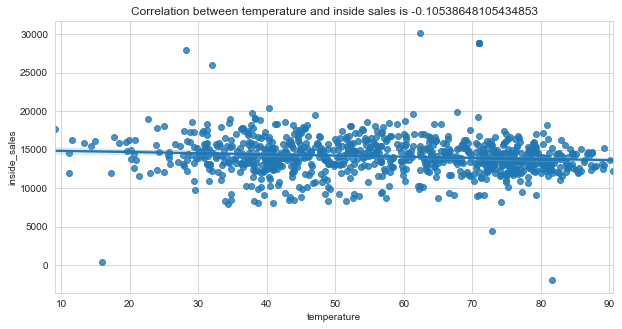

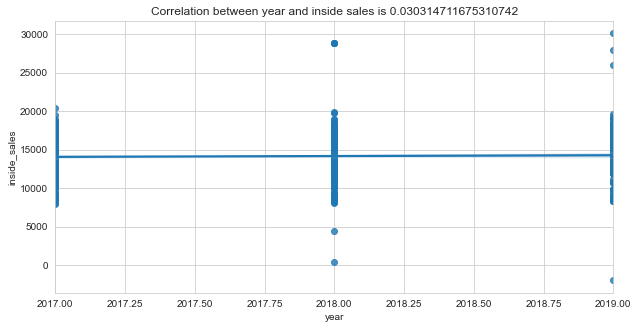

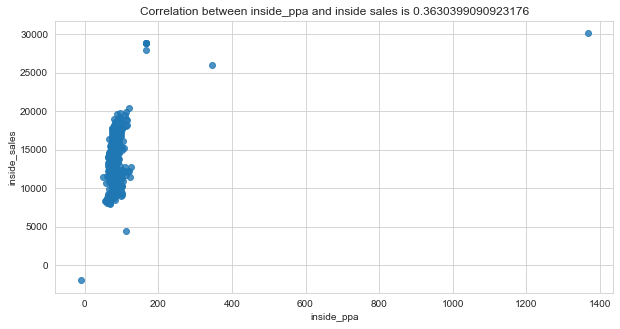

In [19]:
y = z['inside_sales']
col = y.index

for i in range(len(col)):
    if (col[i] != 'inside_sales'):
        plt.subplots(figsize=(10,5))
        sns.regplot(x= data[col[i]], y=data['inside_sales'], data= data)
        plt.title(f'Correlation between {col[i]} and inside sales is {y[i]}')

